In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import uproot
import os
import glob
import awkward as ak
from scipy.stats import norm
plt.rcParams["xtick.top"] = True    # enable top x-ticks
plt.rcParams["ytick.right"] = True  # enable right y-ticks
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

In [2]:
data_path = "/home/haue/repositories/Masters/data/alphas/Al/"
bgpath =  "/home/haue/repositories/Masters/data/sorted/background"

Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
bgfiles = glob.glob(os.path.join(bgpath, "*.root"))

In [29]:

Eb = np.array([])
for batch in uproot.iterate(bgfiles, expressions=["E"],
                            cut="(id==1) | (id==2)"):
    Eb = np.append(Eb, ak.flatten(batch.E))
    
E = np.array([]); Edep = np.array([])
for batch in uproot.iterate(Al_files, expressions=["Ea","Edep"],
                            cut="(id==1) | (id==2)"):
    E = np.append(E, ak.flatten(batch.Ea))
    Edep = np.append(Edep, ak.flatten(batch.Edep))

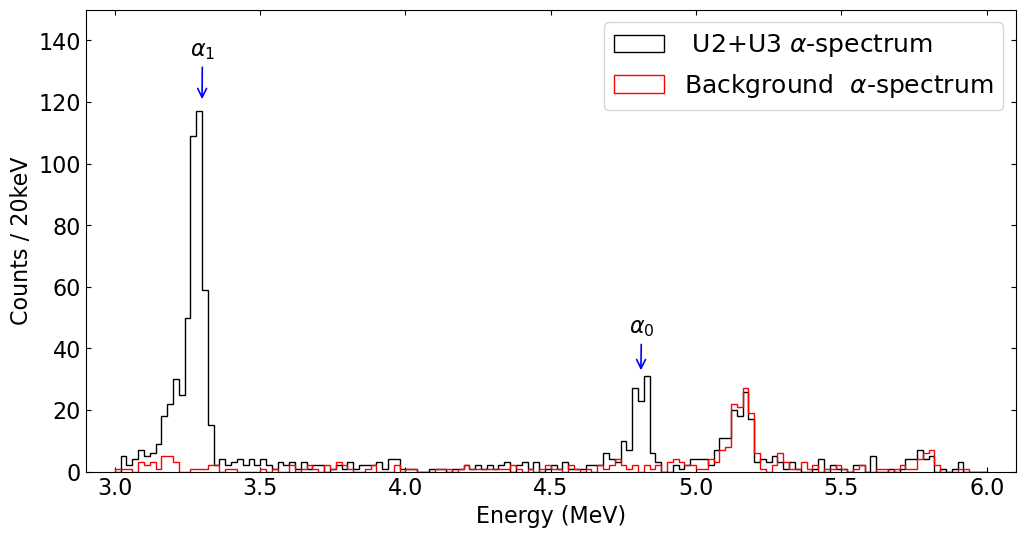

In [5]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,6))
plt.hist(E/1e3, bins=np.arange(3,6+0.02,0.02), histtype='step', color='k', label=r" U2+U3 $\alpha$-spectrum")
plt.hist(Eb/1.004/1e3, bins=np.arange(3,6+0.02,0.02), histtype='step', color='r', label=r"Background  $\alpha$-spectrum")
plt.yscale('linear')
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts / 20keV")
plt.xticks(np.arange(2,7,0.5))
plt.xlim(2.9,6.1)
plt.ylim(0,150)
plt.legend(fontsize=18)
plt.annotate(r"$\alpha_1$", (3.3,120), (3.258,135), arrowprops=dict(arrowstyle="->", lw=1.2, color="blue"), fontsize=16)
plt.annotate(r"$\alpha_0$", (4.81,32), (4.768,45), arrowprops=dict(arrowstyle="->", lw=1.2, color="blue"), fontsize=16)

plt.show()


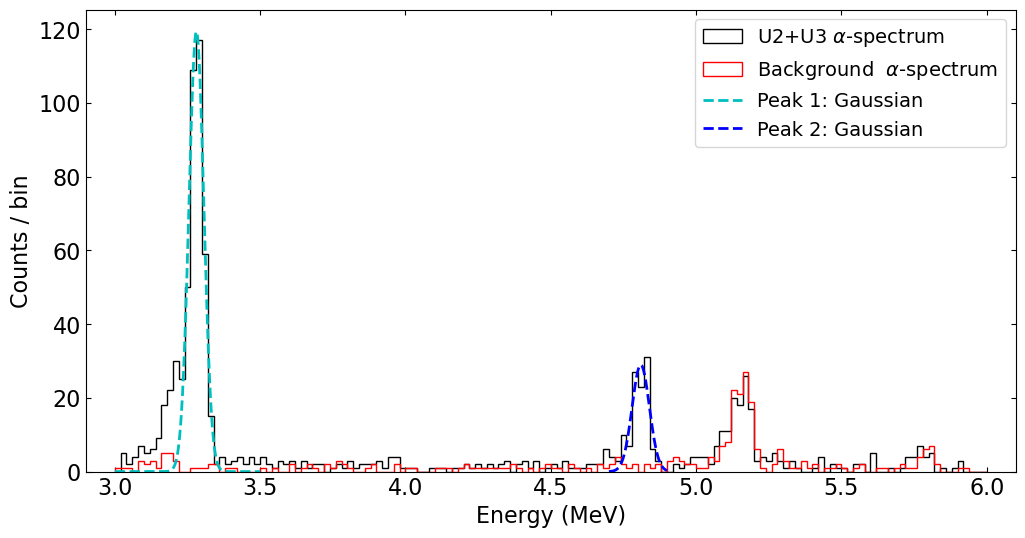

Peak 1 (3–3.5 MeV):
A = 119.3, mu = 3.2806 MeV, sigma = 25.7 keV

Peak 2 (4.8–4.9 MeV):
A = 28.9, mu = 4.8096 MeV, sigma = 29.8 keV


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1️⃣ Flatten and prepare the data
E = np.array(E, dtype=float)  # ensure numeric
bins = np.arange(3, 6+0.02, 0.02)
counts, bin_edges = np.histogram(E/1e3, bins=bins)
centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
counts = counts.astype(float)

# 2️⃣ Define a simple Gaussian
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2*sigma**2))

# 3️⃣ First Gaussian fit (3–3.5 MeV)
mask1 = (centers >= 3.0) & (centers <= 3.5)
centers1 = centers[mask1]
counts1 = counts[mask1]
p0_1 = [max(counts1), 3.3, 0.05]
popt1, pcov1 = curve_fit(gauss, centers1, counts1, p0=p0_1)

# 4️⃣ Second Gaussian fit (4.8–4.9 MeV)
mask2 = (centers >= 4.7) & (centers <= 4.9)
centers2 = centers[mask2]
counts2 = counts[mask2]
p0_2 = [max(counts2), 4.82, 0.01]
popt2, pcov2 = curve_fit(gauss, centers2, counts2, p0=p0_2)

# 5️⃣ Plot full spectrum and fits
plt.figure(figsize=(12,6))
plt.hist(E/1e3, bins=bins, histtype='step', color='k', label=r"U2+U3 $\alpha$-spectrum")
plt.hist(Eb/1.004/1e3, bins=np.arange(3,6+0.02,0.02), histtype='step', color='r', label=r"Background  $\alpha$-spectrum")

# Gaussian fits
E_fit1 = np.linspace(3,3.5,300)
plt.plot(E_fit1, gauss(E_fit1, *popt1), 'c--', lw=2, label='Peak 1: Gaussian')

E_fit2 = np.linspace(4.7,4.9,200)
plt.plot(E_fit2, gauss(E_fit2, *popt2), 'b--', lw=2, label='Peak 2: Gaussian')

plt.xlabel("Energy (MeV)")
plt.ylabel("Counts / bin")
plt.xlim(2.9,6.1)
plt.legend(fontsize=14)
plt.show()

# 6️⃣ Print fit results
print("Peak 1 (3–3.5 MeV):")
print(f"A = {popt1[0]:.1f}, mu = {popt1[1]:.4f} MeV, sigma = {popt1[2]*1e3:.1f} keV\n")
print("Peak 2 (4.8–4.9 MeV):")
print(f"A = {popt2[0]:.1f}, mu = {popt2[1]:.4f} MeV, sigma = {popt2[2]*1e3:.1f} keV")
